In [70]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

In [71]:
zachary = pd.read_csv("out.ucidata-zachary", sep=" ")

In [72]:
def draw_subgraph(G):
    plt.figure(figsize=(20,14))
    nx.draw(G, pos=nx.spring_layout(G), with_labels=True, cmap=plt.get_cmap('coolwarm'), node_size=250, width=1)
    return plt

In [73]:
zachary_graph = nx.from_pandas_edgelist(zachary, '1', '2')

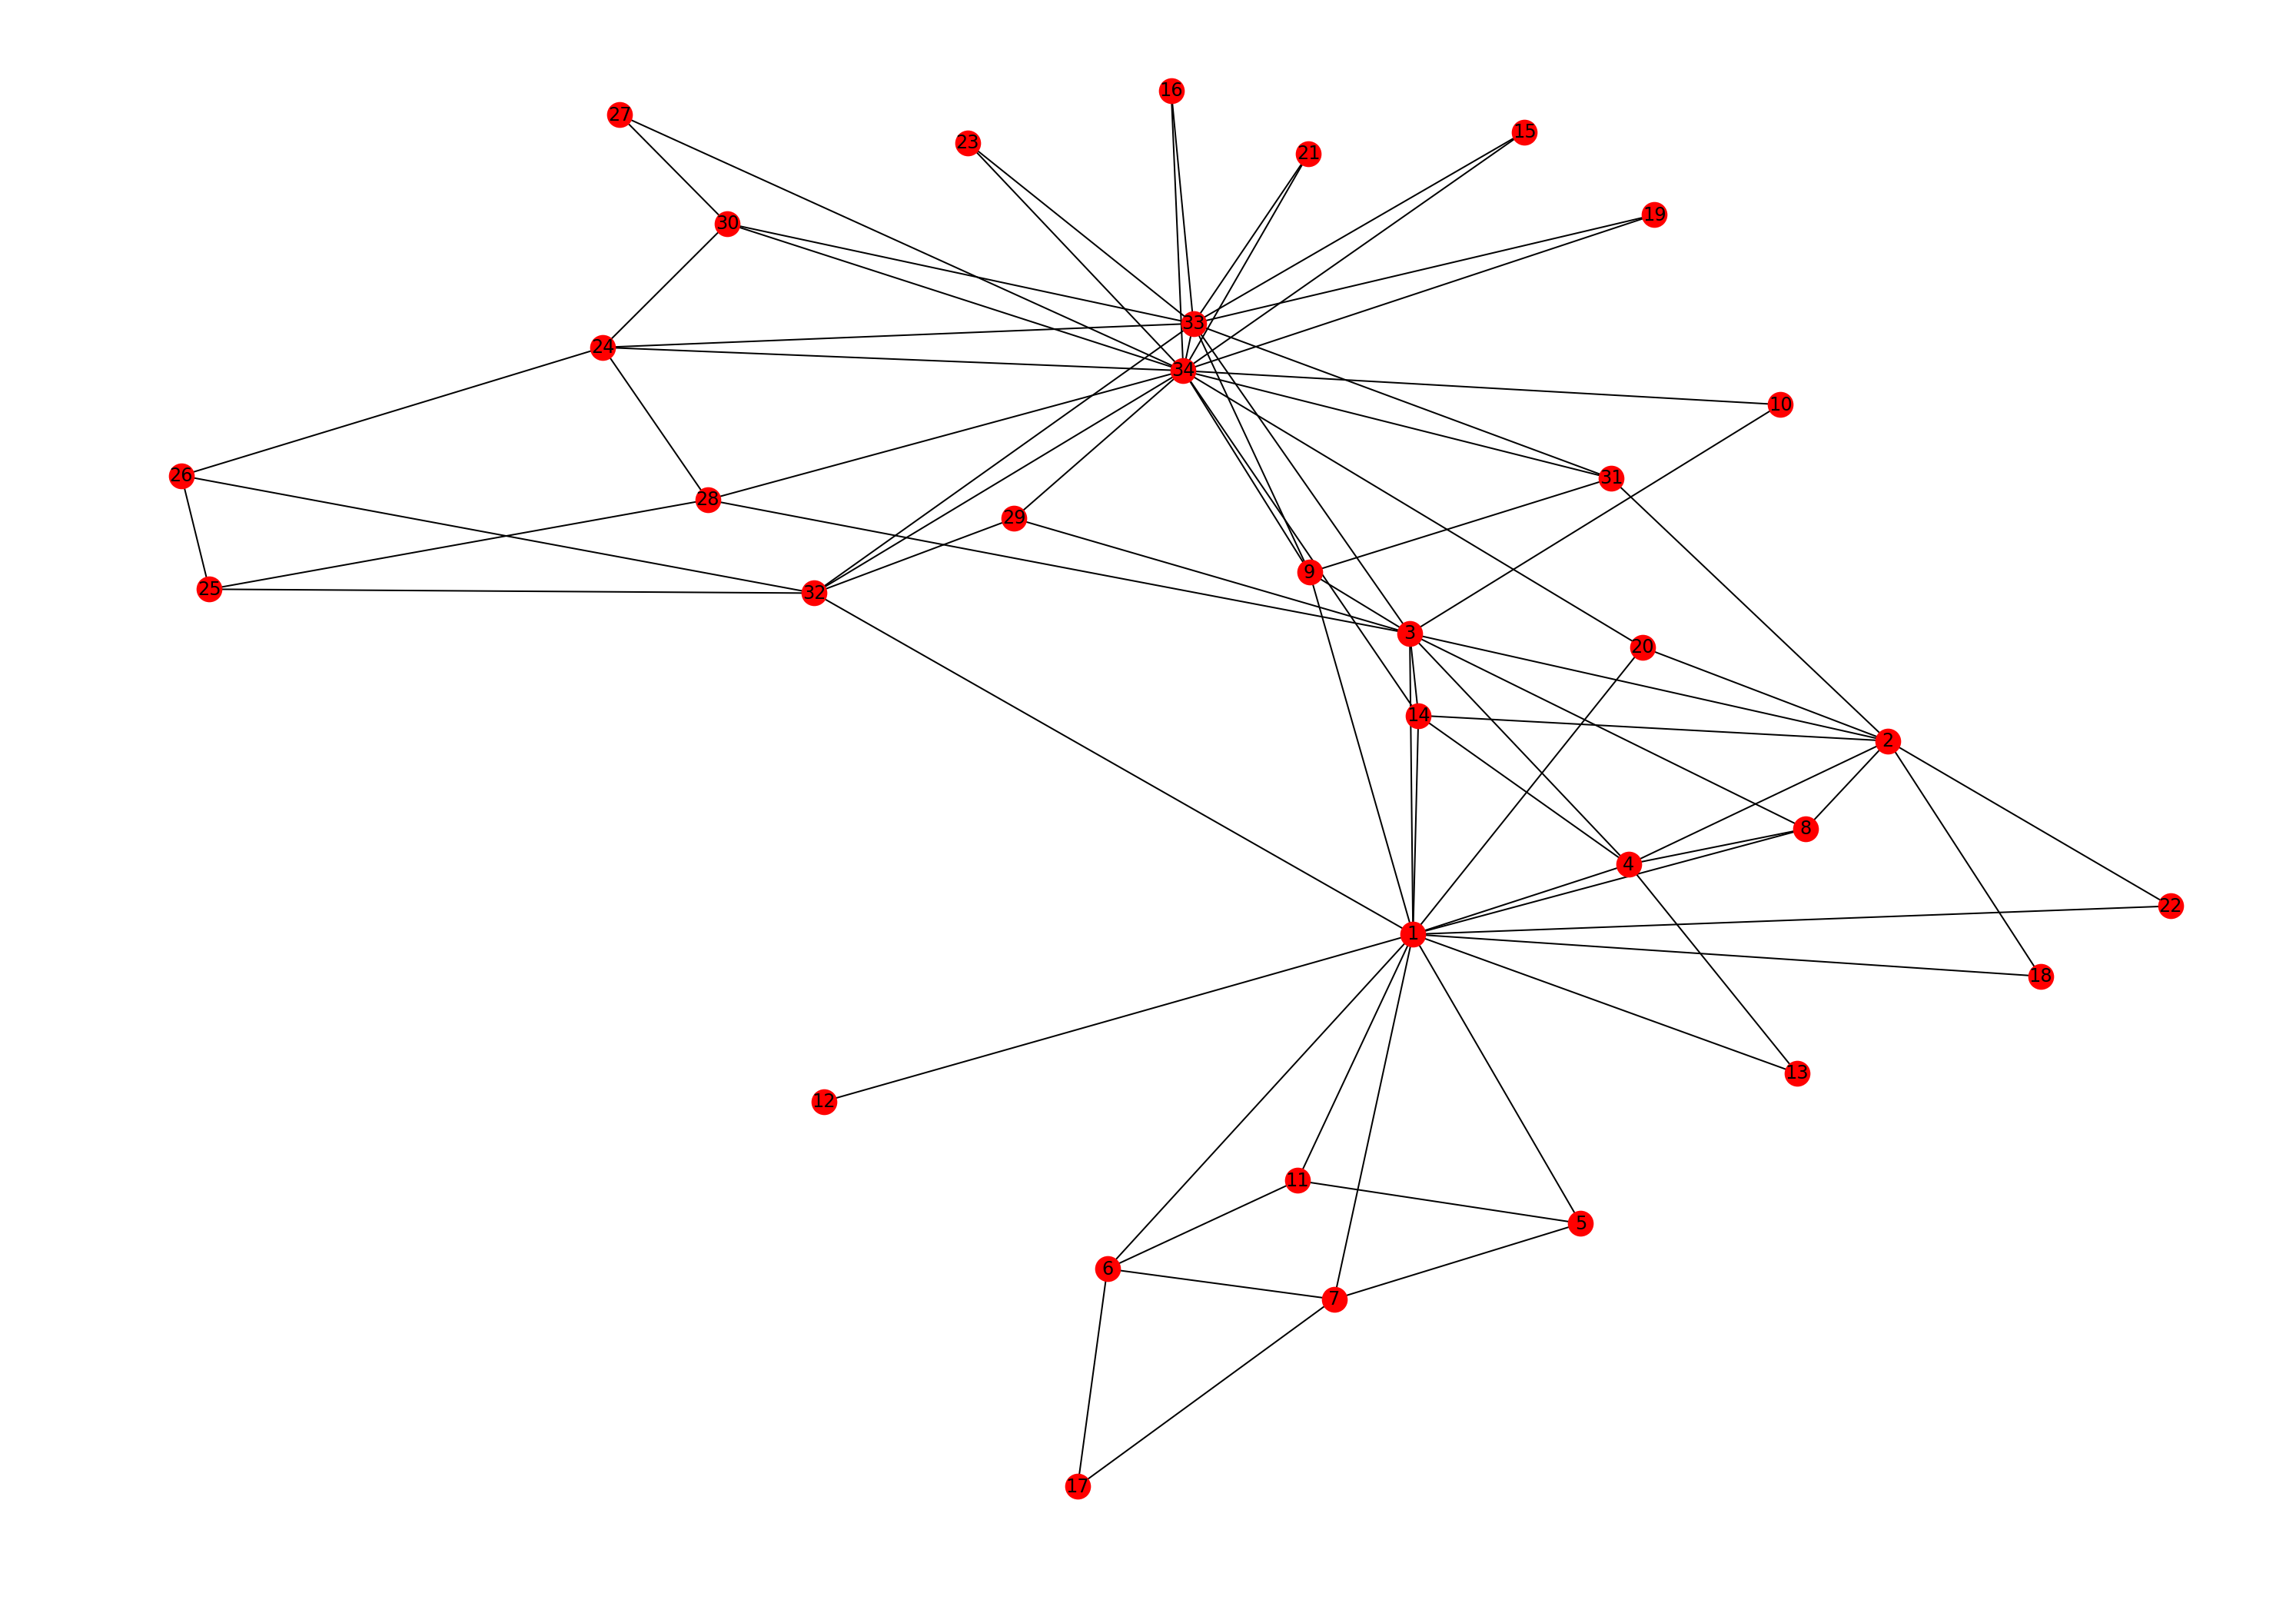

In [74]:
fig = draw_subgraph(zachary_graph)
fig.savefig('zachary.png')